In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
%config Completer.use_jedi = False

In [2]:
df = pd.read_csv('No_null_values.csv', index_col=[0])

In [3]:
df.T

,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
Interaction,aa90260b-4141-4a24-8e36-b04ce1f4f77b,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,344d114c-3736-4be5-98f7-c72c281e2d35,abfa2b40-2d43-4994-b15a-989b8c79e311,68a861fd-0d20-4e51-a587-8a90407ee574,2b451d12-6c2b-4cea-a295-ba1d6bced078,6630d501-838c-4be4-a59c-6f58c814ed6a,70ddaa89-b726-49dc-9022-2d655e4c7936,05a49ee3-8fd5-453a-a5f3-82b6cd986856,86f17e4d-2c24-4b70-a6ec-dddf0609dbaa,...,89d0d064-307e-4f21-a5b4-6ec1137c8bfc,24f1d865-3d58-495f-9dc9-b5927a1fd40a,ce7abedd-6437-4609-9123-8a4a8234381e,3f3c716b-fd57-40f2-8a58-d944efcf1fd5,c60df12b-a50b-4397-ae57-98381a0d3960,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,6e96b921-0c09-4993-bbda-a1ac6411061a,e8307ddf-9a01-4fff-bc59-4742e03fd24f,3775ccfc-0052-4107-81ae-9657f81ecdf3,9de5fb6e-bd33-4995-aec8-f01d0172a499
City,Point Baker,West Branch,Yamhill,Del Mar,Needville,Fort Valley,Pioneer,Oklahoma City,Saint Cloud,Cincinnati,...,Gilmore City,Smyrna,Haubstadt,Machias,West Kill,Mount Holly,Clarksville,Mobeetie,Carrollton,Clarkesville
State,AK,MI,OR,CA,TX,GA,TN,OK,FL,OH,...,IA,NY,IN,ME,NY,VT,TN,TX,GA,GA
County,Prince of Wales-Hyder,Ogemaw,Yamhill,San Diego,Fort Bend,Peach,Scott,Oklahoma,Osceola,Hamilton,...,Humboldt,Chenango,Gibson,Washington,Greene,Rutland,Montgomery,Wheeler,Carroll,Habersham
Zip,99927,48661,97148,92014,77461,31030,37847,73109,34771,45237,...,50541,13464,47639,4654,12492,5758,37042,79061,30117,30523
Lat,56.251,44.32893,45.35589,32.96687,29.38012,32.57032,36.4342,35.43313,28.27646,39.19296,...,42.71548,42.68582,38.17985,44.77104,42.18491,43.43391,36.56907,35.52039,33.58016,34.70783
Lng,-133.37571,-84.2408,-123.24657,-117.24798,-95.80673,-83.8904,-84.27892,-97.52463,-81.16273,-84.4523,...,-94.44913,-75.61754,-87.57497,-67.55341,-74.33574,-72.78734,-87.41694,-100.4418,-85.13241,-83.53648
Population,38,10446,3735,13863,11352,17701,2535,23144,17351,20193,...,836,1378,4261,3209,210,640,77168,406,35575,12230
Area,Urban,Urban,Urban,Suburban,Suburban,Urban,Suburban,Suburban,Suburban,Rural,...,Rural,Rural,Suburban,Rural,Urban,Rural,Rural,Rural,Urban,Urban
Timezone,America/Sitka,America/Detroit,America/Los_Angeles,America/Los_Angeles,America/Chicago,America/New_York,America/New_York,America/Chicago,America/New_York,America/New_York,...,America/Chicago,America/New_York,America/Chicago,America/New_York,America/New_York,America/New_York,America/Chicago,America/Chicago,America/New_York,America/New_York


In [4]:
#(df.applymap(type) == str).all(0)

In [5]:
df.dtypes

Interaction                     object
City                            object
State                           object
County                          object
Zip                              int64
Lat                            float64
Lng                            float64
Population                       int64
Area                            object
Timezone                        object
Job                             object
Children                       float64
Age                            float64
Education                       object
Employment                      object
Income                         float64
Marital                         object
Gender                          object
Churn                           object
Outage_sec_perweek             float64
Email                            int64
Contacts                         int64
Yearly_equip_failure             int64
Techie                           int64
Contract                        object
Port_modem               

In [6]:
idx = (df.applymap(type) == str).all(0)

In [7]:

df_strings_only = df[df.columns[idx]]

In [8]:
df_strings_only.drop('Interaction', axis=1, inplace=True)

/Users/cristophernimatuj/Desktop/Master_folder/jupyter/Jupyter_notebook/env/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
for key, values in df_strings_only.items():
    print(f'\n\n\n****{key}****')
    print(df[key].value_counts())




****City****
Houston              34
New York             24
Buffalo              23
Springfield          23
San Antonio          22
                     ..
Offerle               1
Fort Thompson         1
Apple Valley          1
Black River Falls     1
Saint Michaels        1
Name: City, Length: 6058, dtype: int64



****State****
TX    603
NY    558
PA    550
CA    526
IL    413
OH    359
FL    324
MO    310
VA    285
NC    280
IA    279
MI    279
MN    264
WV    247
IN    241
GA    238
KY    238
WI    228
OK    203
KS    195
NJ    190
TN    185
NE    181
AL    181
AR    176
WA    175
MA    172
CO    155
LA    141
MS    126
SC    124
MD    123
ND    118
OR    114
NM    114
ME    112
AZ    112
SD    101
MT     96
NH     85
VT     84
ID     81
AK     77
CT     71
UT     66
NV     48
WY     43
PR     40
HI     35
DE     21
RI     19
DC     14
Name: State, dtype: int64



****County****
Washington     111
Jefferson      100
Montgomery      99
Franklin        92
Los Angeles     91
     

## looking through the strings columns it seems to have good variety, and for the most part spread out

In [10]:
idx = (df.applymap(type) == int).all(0)

In [11]:
df_int_cols = df[df.columns[idx]]

In [12]:
df_int_cols

,Zip,Population,Email,Contacts,Yearly_equip_failure,Techie,Phone,TechSupport,item1,item2,item3,item4,item5,item6,item7,item8
1,99927,38,10,0,1,1,2,1,5,5,5,3,4,4,3,4
2,48661,10446,12,0,1,2,2,1,3,4,3,3,4,3,4,4
3,97148,3735,9,0,1,2,2,1,4,4,2,4,4,3,3,3
4,92014,13863,15,2,0,2,2,1,4,4,4,2,5,4,3,3
5,77461,11352,16,2,1,1,1,2,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,5758,640,12,2,0,0,0,1,3,2,3,3,4,3,2,3
9997,37042,77168,15,2,0,0,0,1,4,5,5,4,4,5,2,5
9998,79061,406,10,0,0,1,2,1,4,4,4,4,4,4,4,5
9999,30117,35575,14,1,0,1,1,2,4,4,6,4,3,3,5,4


In [13]:
for key, values in df_int_cols.items():
    print(f'\n\n\n***{key}***')
    print(df[key].value_counts(normalize=True) * 100)




***Zip***
87063    0.04
75077    0.04
44310    0.04
61764    0.04
32340    0.04
         ... 
22312    0.01
75558    0.01
48933    0.01
16623    0.01
49111    0.01
Name: Zip, Length: 8583, dtype: float64



***Population***
0        0.97
94       0.14
110      0.12
39       0.12
69       0.11
         ... 
27089    0.01
29138    0.01
3991     0.01
25048    0.01
6049     0.01
Name: Population, Length: 5933, dtype: float64



***Email***
12    13.10
11    12.91
13    12.68
10    10.74
14    10.60
15     7.79
9      7.74
8      5.43
16     5.17
17     3.51
7      3.16
18     2.03
6      1.85
5      1.09
19     1.00
20     0.51
4      0.31
3      0.14
21     0.12
2      0.06
1      0.03
22     0.02
23     0.01
Name: Email, dtype: float64



***Contacts***
0    36.80
1    36.75
2    18.72
3     6.08
4     1.37
5     0.20
6     0.05
7     0.03
Name: Contacts, dtype: float64



***Yearly_equip_failure***
0    67.27
1    26.70
2     5.09
3     0.86
4     0.07
6     0.01
Name: Yearly_equip_f

In [14]:
df_int_cols.describe()

,Zip,Population,Email,Contacts,Yearly_equip_failure,Techie,Phone,TechSupport,item1,item2,item3,item4,item5,item6,item7,item8
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49153.319600,9756.562400,12.016000,0.994200,0.398000,0.878000,1.710200,1.238300,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,27532.196108,14432.698671,3.025898,0.988466,0.635953,0.598792,0.641137,0.616239,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,601.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,26292.500000,738.000000,10.000000,0.000000,0.000000,1.000000,2.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,48869.500000,2910.500000,12.000000,1.000000,0.000000,1.000000,2.000000,1.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,71866.500000,13168.000000,14.000000,2.000000,1.000000,1.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,99929.000000,111850.000000,23.000000,7.000000,6.000000,2.000000,2.000000,2.000000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


## int columns 
- will have to explore the values in the population cols
    - why do we such a descrispencies 
- Email
    - 57% of the customers recieve emails in the range of 10 - 14
    - further research + visualization needed
- contacts 
    - contact range 0-2 ~92.17
    -  3 contacts 6.08 - possibly combined 3+ all together 
- yearly_equip_failure is similar to the contact column
- Phone column is skewed towards 2
- for the items columns most customers choosed between the range of 2-5

In [15]:
idx = (df.applymap(type) == int).all(0)

In [16]:
idx = (df.applymap(type) == float).all(0)

In [17]:
float_cols = df[df.columns[idx]]

In [18]:
float_cols

,Lat,Lng,Children,Age,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
1,56.25100,-133.37571,2.0,68.0,28561.990000,6.972566,6.795513,171.449762,904.536110
2,44.32893,-84.24080,1.0,27.0,21704.770000,12.014541,1.156681,242.948015,800.982766
3,45.35589,-123.24657,4.0,50.0,36028.798176,10.245616,15.754144,159.440398,2054.706961
4,32.96687,-117.24798,1.0,48.0,18925.230000,15.206193,17.087227,120.249493,2164.579412
5,29.38012,-95.80673,0.0,83.0,40074.190000,8.960316,1.670972,150.761216,271.493436
...,...,...,...,...,...,...,...,...,...
9996,43.43391,-72.78734,3.0,53.0,55723.740000,9.265392,68.197130,159.828800,6511.253000
9997,36.56907,-87.41694,4.0,48.0,36028.798176,8.115849,61.040370,208.856400,5695.952000
9998,35.52039,-100.44180,2.0,53.0,36028.798176,4.837696,37.780000,168.220900,4159.306000
9999,33.58016,-85.13241,1.0,39.0,16667.580000,12.076460,71.095600,252.628600,6468.457000


In [19]:
float_cols.drop(columns=['Lat', 'Lng'], axis=1, inplace=True)

/Users/cristophernimatuj/Desktop/Master_folder/jupyter/Jupyter_notebook/env/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
float_cols.describe()

,Children,Age,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.072000,53.207500,39024.575538,11.452955,34.494108,174.076305,3398.861812
std,1.867127,18.003457,24626.919269,7.025921,25.228018,43.335473,2072.712613
min,0.000000,18.000000,740.660000,-1.348571,1.000259,77.505230,155.506715
25%,1.000000,41.000000,23660.790000,8.054362,8.700329,141.071078,1312.130487
50%,2.000000,53.000000,36028.798176,10.202896,37.780000,169.915400,3399.029431
75%,3.000000,65.000000,45504.192500,12.487644,60.153487,203.777441,5466.284500
max,10.000000,89.000000,258900.700000,47.049280,71.999280,315.878600,7158.982000


In [21]:
for key, values in float_cols.items():
    print(f'\n\n\n***{key}***')
    print(float_cols[key].value_counts(normalize=True) * 100)




***Children***
2.0     35.95
0.0     19.19
1.0     18.74
3.0     10.96
4.0      7.69
5.0      1.61
8.0      1.58
7.0      1.49
6.0      1.35
10.0     0.74
9.0      0.70
Name: Children, dtype: float64



***Age***
53.0    25.68
55.0     1.28
41.0     1.22
77.0     1.21
80.0     1.20
        ...  
59.0     0.92
78.0     0.92
87.0     0.92
18.0     0.90
47.0     0.87
Name: Age, Length: 72, dtype: float64



***Income***
36028.798176    18.02
36913.919693     6.88
36461.200000     0.02
10530.090000     0.02
25598.660000     0.02
                ...  
24608.160000     0.01
47386.970000     0.01
18593.160000     0.01
52756.230000     0.01
35089.380000     0.01
Name: Income, Length: 7508, dtype: float64



***Outage_sec_perweek***
6.242131     0.02
11.791120    0.02
12.107050    0.02
10.768330    0.02
10.344120    0.02
             ... 
11.398846    0.01
8.667141     0.01
13.424480    0.01
3.740574     0.01
11.331930    0.01
Name: Outage_sec_perweek, Length: 9993, dtype: float64



***Tenu

## float columns 
- childen
    - anything above 4 kids seems to be an anomalie/rare
- income 
    - min value seems like an outlier
    - 36028.798176  =  18.02 seems to be a bit odd. will have to look into this
    - 36913.919693  =   6.88 will look into this as well
- outage_sec_perweek
    - seems fairly spreadout 
    - seems to have a few outliers near the max 
- Tenure seems to be well spread out with unique values (still will take a look at it
- monthlyCharge seems to be well spread out with unique values
    - will look for any outliers 
- bandwidth
    - seems to be well spread out with unique values
    - will look for any outliers
    
    

In [22]:
cols_to_look_into = ['Population', 'Email', 'Contacts', 'Phone', 'Yearly_equip_failure', 'Children', 'Age', 'Income',
                    'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']

In [23]:
eda_df = df.loc[:,['Population', 'Email', 'Contacts', 'Phone', 'Yearly_equip_failure', 'Children', 'Age', 'Income',
      'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

# I will use univariated technique to find anomalies
    - I will use visualiation methods 
        - box plot
        - Histogram 
        - 95 percent accuracy 
    - impute outliers with mean, median, value or manually insert numbers
    - <!--on some columns I might normalize the values -->
    

# Population
    - To do
        - why is there 0's in some rows

<AxesSubplot:xlabel='Population'>

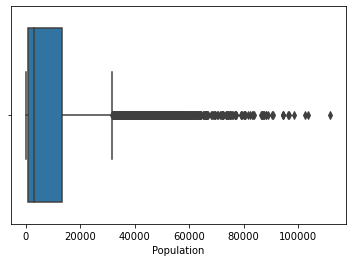

In [24]:
sns.boxplot(data=df, x=df.Population)

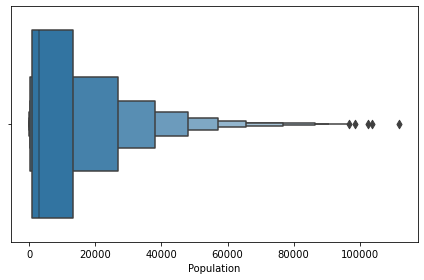

In [25]:
sns.boxenplot(data=df, x=df.Population)
plt.tight_layout()

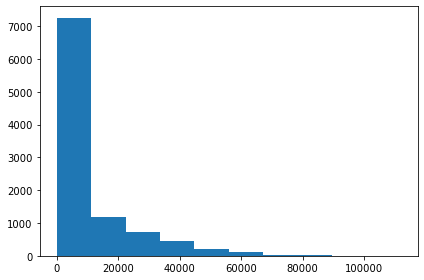

In [26]:
plt.hist(df['Population'])
plt.tight_layout()

In [27]:
Percentages = [.05, .25, .50, .75, .95]

In [28]:
Population_percentiles = eda_df['Population'].quantile(Percentages)

In [29]:
Population_percentiles = pd.DataFrame([Population_percentiles])
Population_percentiles

,0.05,0.25,0.50,0.75,0.95
Population,102.95,738.0,2910.5,13168.0,40770.4


In [30]:
Population_percentiles = Population_percentiles.T

In [31]:
Population_percentiles

,Population
0.05,102.95
0.25,738.00
0.50,2910.50
0.75,13168.00
0.95,40770.40


In [32]:
eda_df.loc[(eda_df['Population'] < 103) |
   (eda_df['Population'] > 40771)]

,Population,Email,Contacts,Phone,Yearly_equip_failure,Children,Age,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
1,38,10,0,2,1,2.0,68.0,28561.990000,6.972566,6.795513,171.449762,904.536110
14,0,14,1,2,0,5.0,53.0,115114.570000,6.568344,16.879220,185.659294,1948.694497
17,50079,13,1,2,0,2.0,63.0,31659.300000,14.429165,15.782150,195.872604,2070.376729
21,69,14,0,2,3,4.0,53.0,39624.210000,12.186698,20.453910,185.096264,2330.319383
30,52484,18,1,2,0,4.0,69.0,36913.919693,12.354372,5.425865,259.387918,1745.125956
...,...,...,...,...,...,...,...,...,...,...,...,...
9926,40830,14,0,2,0,2.0,72.0,36028.798176,11.825280,37.833700,196.700700,3903.675000
9945,0,9,0,2,0,0.0,85.0,46731.010000,13.380300,59.852980,172.165700,5116.489000
9949,101,13,1,2,0,3.0,77.0,36028.798176,8.569144,64.418590,206.912900,5760.777000
9988,87509,8,1,2,0,2.0,53.0,102629.600000,7.231711,54.545380,219.019400,5135.576000


In [33]:
eda_df.loc[(eda_df['Population'] < 103)]

,Population,Email,Contacts,Phone,Yearly_equip_failure,Children,Age,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
1,38,10,0,2,1,2.0,68.0,28561.990000,6.972566,6.795513,171.449762,904.536110
14,0,14,1,2,0,5.0,53.0,115114.570000,6.568344,16.879220,185.659294,1948.694497
21,69,14,0,2,3,4.0,53.0,39624.210000,12.186698,20.453910,185.096264,2330.319383
42,23,16,2,2,0,3.0,53.0,52887.260000,6.522329,37.780000,105.942947,892.896493
54,94,6,0,2,0,0.0,31.0,44137.600000,8.505760,1.552782,167.310822,452.872150
...,...,...,...,...,...,...,...,...,...,...,...,...
9798,37,14,0,2,0,0.0,53.0,38224.650000,15.194540,37.780000,181.949600,4082.913000
9845,33,9,0,2,0,1.0,84.0,74145.440000,11.695710,66.601660,221.538500,5952.695000
9874,74,9,1,2,1,2.0,63.0,36028.798176,11.744760,40.960000,112.209800,3399.029431
9945,0,9,0,2,0,0.0,85.0,46731.010000,13.380300,59.852980,172.165700,5116.489000


In [34]:
eda_df.loc[(eda_df['Population'] > 80_000)]

,Population,Email,Contacts,Phone,Yearly_equip_failure,Children,Age,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
158,86926,9,2,2,1,1.0,39.0,36028.798176,7.519193,5.969967,175.495369,967.981914
204,90517,15,2,2,0,3.0,83.0,44223.580000,8.339727,36.440000,128.445831,1430.761492
443,88349,10,0,1,0,1.0,29.0,21897.410000,14.520864,1.171557,183.866945,544.123260
1212,87240,18,1,2,0,0.0,80.0,36913.919693,2.862714,5.550110,188.408120,894.410255
1399,89075,14,1,2,0,4.0,53.0,27950.050000,10.297093,17.120479,142.143401,2275.166320
1776,98660,15,1,2,0,2.0,54.0,77423.320000,7.306481,15.180360,241.811328,3399.029431
1894,94395,6,1,2,0,2.0,29.0,36028.798176,8.601636,18.793976,172.744824,2057.159348
2212,81789,8,1,0,0,2.0,40.0,51427.430000,11.115848,6.840972,195.575941,919.516516
2403,94512,16,0,2,0,1.0,76.0,24729.420000,8.649108,5.792794,129.881692,1110.224942
3054,80555,14,0,2,1,2.0,53.0,89747.430000,14.285090,11.313820,115.817600,3399.029431


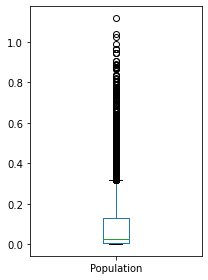

In [35]:
ax = (eda_df['Population']/100_000).plot.box(figsize=(3,4))
plt.tight_layout()
plt.show()

In [36]:
df['Population'].sample(frac=.5).mean()

9712.4922

In [37]:
sample = pd.DataFrame({
    'Samples': [df['Population'].sample(n=2000).mean() for _ in range(1000)],
    'types': 'Mean'
})

In [38]:
sample.mean()

Samples    9753.714232
dtype: float64

In [39]:
eda_df.Population.mean()

9756.5624

In [40]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number

Pop_mean, Pop_std = mean(eda_df.Population), std(eda_df.Population)
# print(Pop_mean, Pop_std)
cut_off = Pop_std * 3 # 3 standard deviatons 
lower, upper = Pop_mean - cut_off, Pop_mean + cut_off

outliers = [x for x in eda_df['Population'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

outliers_removed = [x for x in eda_df['Population'] if x >= lower and x <= upper]
print('Non-outliers observations: %d' % len(outliers_removed))

Identified outliers: 219
Non-outliers observations: 9781


In [41]:
Pop_df = eda_df.loc[(eda_df.Population >= lower) &
          (eda_df.Population <= upper)]

In [42]:
eda_df = eda_df.loc[(eda_df.Population >= lower) &
          (eda_df.Population <= upper)]

In [43]:
#len(df)

In [44]:
#df = df.loc[(df.Population >= lower) &
#            (df.Population <= upper)]

In [45]:
#len(df)

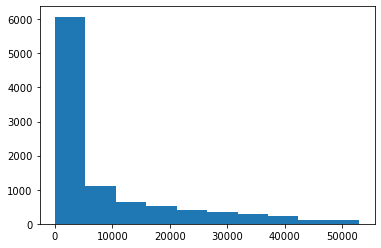

<Figure size 432x288 with 0 Axes>

In [46]:
plt.hist(Pop_df.Population)

plt.show()
plt.tight_layout()

<AxesSubplot:xlabel='Population'>

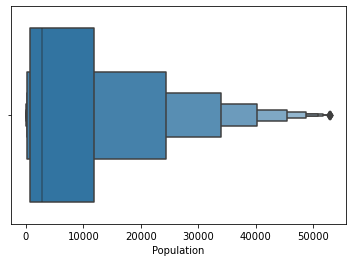

In [47]:
sns.boxenplot(data=Pop_df, x=Pop_df.Population)

<AxesSubplot:xlabel='Population'>

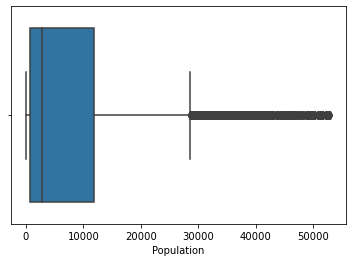

In [48]:
sns.boxplot(data=Pop_df, x=Pop_df.Population)

<AxesSubplot:xlabel='Population'>

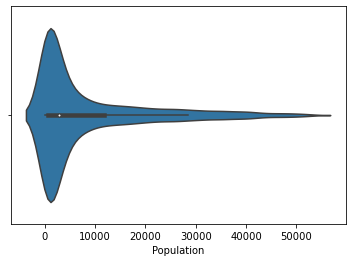

In [49]:
sns.violinplot(data=Pop_df, x=Pop_df.Population)

<AxesSubplot:xlabel='Population'>

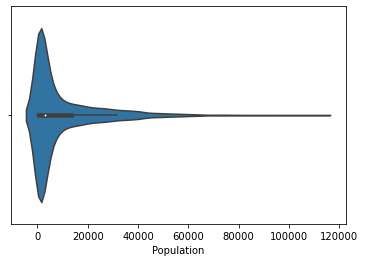

In [50]:
sns.violinplot(data=df, x=df.Population)

In [51]:
cols_to_look_into

['Population',
 'Email',
 'Contacts',
 'Phone',
 'Yearly_equip_failure',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year']

# looking at the email column

In [52]:
eda_df.Email.value_counts(ascending=True)

23       1
22       2
1        3
2        6
21      11
3       14
4       31
20      51
19      98
5      107
6      179
18     198
7      313
17     342
16     505
8      533
15     752
9      759
14    1035
10    1044
13    1244
11    1273
12    1280
Name: Email, dtype: int64

In [53]:
eda_df.Email.quantile([0.01, 0.9968])

0.0100     5.0
0.9968    20.0
Name: Email, dtype: float64

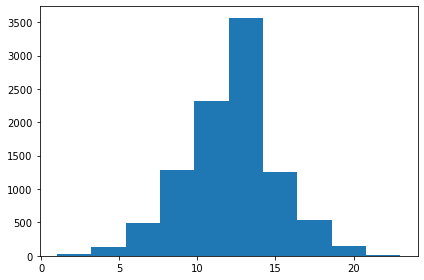

In [54]:
plt.hist(eda_df.Email)
plt.tight_layout()

<AxesSubplot:xlabel='Email'>

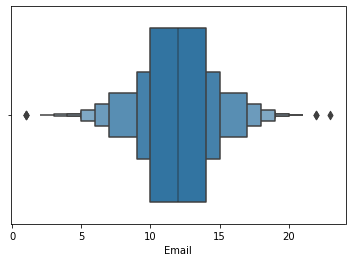

In [55]:
sns.boxenplot(data=eda_df, x= 'Email')

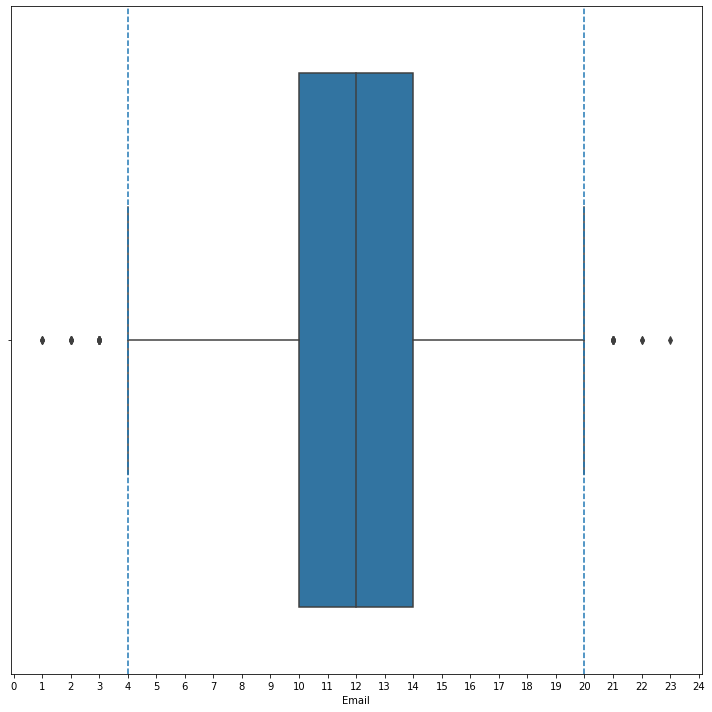

In [56]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.boxplot(data=eda_df, x='Email', ax=ax)
ax.set_xticks(ticks=list(range(0,25)))
ax.axvline(x=4, linestyle= '--'),
ax.axvline(x=20, linestyle='--')
# ax = plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.tight_layout()
plt.show()

In [57]:
eda_df = eda_df.loc[(eda_df.Email >= 4) &
      (eda_df.Email <= 20)]

In [58]:
# df =  df.loc[(df.Email >= 4) &
#        (df.Email <= 20)]

In [59]:
# len(df)

In [60]:
len(eda_df)

9744

In [61]:
cols_to_look_into

['Population',
 'Email',
 'Contacts',
 'Phone',
 'Yearly_equip_failure',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year']

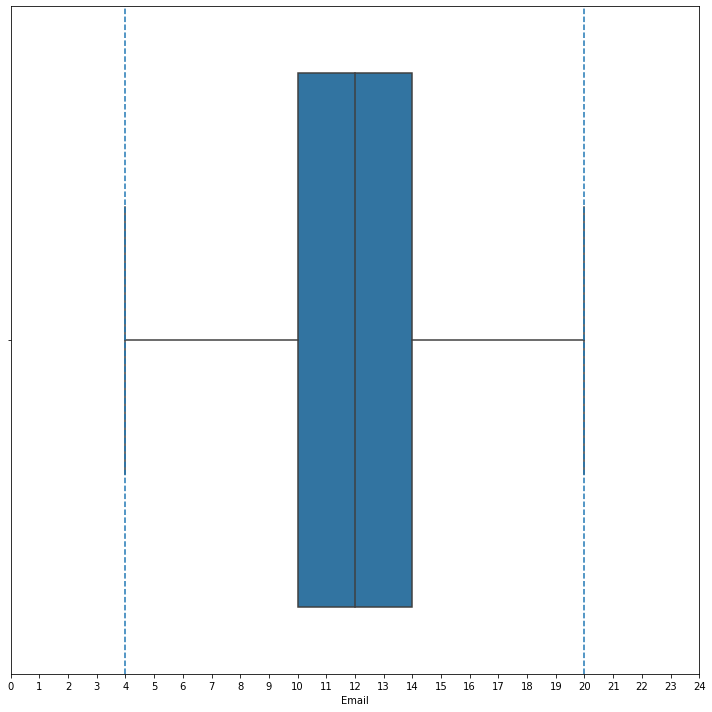

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.boxplot(data=eda_df, x='Email', ax=ax)
ax.set_xticks(ticks=list(range(0,25)))
ax.axvline(x=4, linestyle= '--'),
ax.axvline(x=20, linestyle='--')
# ax = plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.tight_layout()
plt.show()

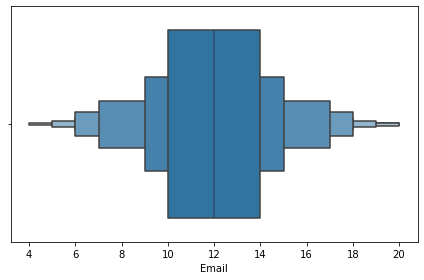

In [63]:
sns.boxenplot(data=eda_df, x= 'Email')
plt.tight_layout()

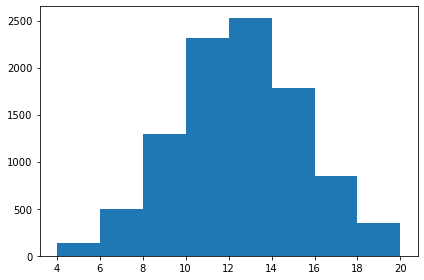

In [64]:
plt.hist(eda_df.Email, bins=8)
plt.tight_layout()

# Contacts

In [65]:
eda_df.Contacts.value_counts(normalize=True) * 100

1    36.781609
0    36.740558
2    18.647373
3     6.147373
4     1.395731
5     0.205255
6     0.051314
7     0.030788
Name: Contacts, dtype: float64

In [66]:
df.loc[df.Contacts >= 5]

,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,...,item6,item7,item8,ChildrenIsMissing,AgeIs_missing,Techieis_missing,Phoneis_missing,TechSupportis_missing,Tenure_is_missing,Bandwidth_GB_YearIs_missing
188,6ec3ca40-a3db-4a9d-b0c8-012950c949bd,Barnesville,PA,Schuylkill,18214,40.79879,-76.08148,1919,Rural,America/New_York,...,3,3,3,False,True,False,False,True,False,False
427,d8016d4c-29fd-479d-b93d-b2b8ca88b703,Tacoma,WA,Pierce,98404,47.20975,-122.41008,35100,Suburban,America/Los_Angeles,...,3,4,3,False,False,False,False,False,False,False
1926,64fed4a7-7144-412b-b5ca-2e1e8918d9dc,Thorndike,MA,Hampden,1079,42.19437,-72.33014,658,Suburban,America/New_York,...,3,4,2,False,True,False,False,False,False,False
2194,c7eed96a-4220-4d8b-8c8b-8e9da4a848b4,Longview,WA,Cowlitz,98632,46.21685,-123.06853,51045,Rural,America/Los_Angeles,...,3,2,2,True,False,True,True,False,False,True
2469,8cdce8b0-94e3-4bb7-ae87-55fc5332c191,Lyons,NE,Burt,68038,41.95408,-96.44589,1310,Urban,America/Chicago,...,3,4,2,True,True,True,False,False,False,False
2571,e14e5c92-18c5-44c2-b024-2f24d2c7c41c,San Ramon,CA,Contra Costa,94583,37.75515,-121.97273,35102,Rural,America/Los_Angeles,...,3,3,4,True,False,False,False,False,True,False
3037,5d49e4c4-76b9-46b2-99d5-0cbc2c2c7df9,Clifton,SC,Spartanburg,29324,34.98374,-81.82677,336,Suburban,America/New_York,...,6,4,5,False,False,False,False,False,False,False
3204,b19a9311-8989-4667-8fd1-efad2f127a67,Hanover,MN,Wright,55341,45.15922,-93.65914,3226,Suburban,America/Chicago,...,4,6,3,False,False,False,False,False,False,False
3904,34f91f3c-acf9-40d8-be6d-8143d6716db9,Verona,WI,Dane,53593,42.98452,-89.57814,23247,Suburban,America/Chicago,...,4,5,5,False,True,False,False,True,True,False
4011,733a91cc-cb27-43e8-859c-4518e9b98a66,Avon,MS,Washington,38723,33.22967,-91.03838,83,Suburban,America/Chicago,...,4,3,4,True,True,True,False,False,False,False


<AxesSubplot:xlabel='Contacts', ylabel='count'>

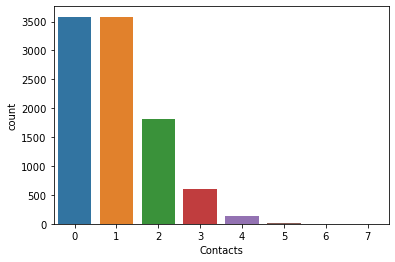

In [67]:
sns.countplot(data=eda_df, x='Contacts')

In [68]:
cols_to_look_into = ['Yearly_equip_failure',
 'Income',
 'Outage_sec_perweek',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year']

### The contacts >= 5 might have some important value when it comes to predicting churning. Since the col is discrete I will not delete the values

In [69]:
eda_df.Yearly_equip_failure.value_counts(normalize=True) * 100

0    67.241379
1    26.713875
2     5.131363
3     0.841544
4     0.061576
6     0.010263
Name: Yearly_equip_failure, dtype: float64

<AxesSubplot:xlabel='count', ylabel='Yearly_equip_failure'>

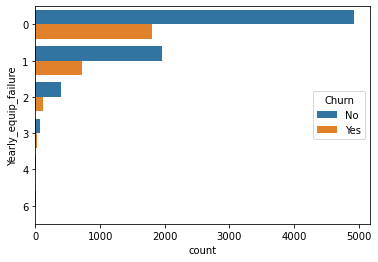

In [70]:
sns.countplot(data=df, y=df.Yearly_equip_failure, hue=df.Churn)


In [71]:
df.loc[df.Yearly_equip_failure >=4]['Churn']

1117    No
1229    No
5167    No
5472    No
6346    No
9387    No
9624    No
9764    No
Name: Churn, dtype: object

# Income

In [72]:
eda_df.Income

1        28561.990000
2        21704.770000
3        36028.798176
4        18925.230000
5        40074.190000
             ...     
9995     56384.350000
9996     55723.740000
9998     36028.798176
9999     16667.580000
10000    36028.798176
Name: Income, Length: 9744, dtype: float64

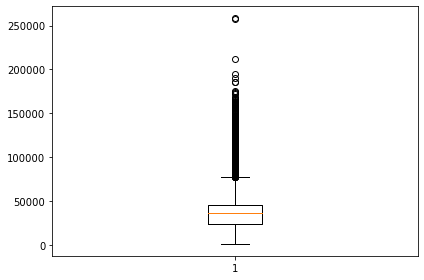

In [73]:
plt.boxplot(x=eda_df.Income)
plt.tight_layout()

In [74]:
Percentages = [0.01, 0.25, 0.5, 0.75, 0.95, 0.99]

In [75]:
eda_df.quantile(Percentages, )

,Population,Email,Contacts,Phone,Yearly_equip_failure,Children,Age,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
0.01,2.86,5.0,0.0,0.0,0.0,0.0,19.0,3919.498400,2.798011,1.358941,92.361017,403.901796
0.25,721.25,10.0,0.0,2.0,0.0,1.0,41.0,23671.927500,8.052311,8.698868,141.071078,1312.091345
0.50,2738.50,12.0,1.0,2.0,0.0,2.0,53.0,36028.798176,10.206146,37.780000,169.953400,3399.029431
0.75,11850.00,14.0,2.0,2.0,1.0,3.0,65.0,45427.355000,12.478615,60.125025,203.891900,5461.247500
0.95,36039.80,17.0,3.0,2.0,2.0,6.0,84.0,87425.093000,19.880803,69.766545,254.037275,6337.775450
0.99,47682.05,19.0,4.0,2.0,2.0,9.0,88.0,126751.075000,41.225043,71.537119,275.875274,6712.940030


<AxesSubplot:xlabel='Income'>

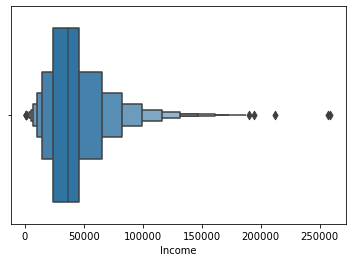

In [76]:
sns.boxenplot(data=eda_df, x='Income')

<AxesSubplot:xlabel='Income'>

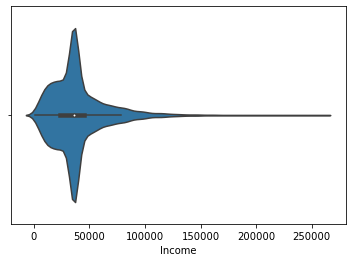

In [77]:
sns.violinplot(data=eda_df, x='Income')

In [78]:
Income_mean, Income_std = eda_df.Income.mean(), eda_df.Income.std()
print('Income mean: %d\n' % Income_mean, '\n'
     'Income median: %d\n' % Income_std)

cut_off = Income_std * 3
print('std*3: %d\n' % cut_off)

low, high = Income_mean - cut_off, Income_mean + cut_off

outliers = [x for x in eda_df.Income if x < low or x > high]
print(len(outliers), 'outliers In the DataFrame\n')

Not_outliers = [x for x in eda_df.Income if x >= low and x <= high]
print(len(Not_outliers), 'len of non outliers in DataFrame')

Income mean: 39028
 
Income median: 24644

std*3: 73934

183 outliers In the DataFrame

9561 len of non outliers in DataFrame


In [79]:
len(eda_df)

9744

In [80]:
eda_df['Income']

1        28561.990000
2        21704.770000
3        36028.798176
4        18925.230000
5        40074.190000
             ...     
9995     56384.350000
9996     55723.740000
9998     36028.798176
9999     16667.580000
10000    36028.798176
Name: Income, Length: 9744, dtype: float64

In [81]:
eda_df.loc[(eda_df.Income >= low) &
          (eda_df.Income <= high)]

,Population,Email,Contacts,Phone,Yearly_equip_failure,Children,Age,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
1,38,10,0,2,1,2.0,68.0,28561.990000,6.972566,6.795513,171.449762,904.536110
2,10446,12,0,2,1,1.0,27.0,21704.770000,12.014541,1.156681,242.948015,800.982766
3,3735,9,0,2,1,4.0,50.0,36028.798176,10.245616,15.754144,159.440398,2054.706961
4,13863,15,2,2,0,1.0,48.0,18925.230000,15.206193,17.087227,120.249493,2164.579412
5,11352,16,2,1,1,0.0,83.0,40074.190000,8.960316,1.670972,150.761216,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,210,14,1,2,0,2.0,46.0,56384.350000,7.110666,28.230000,143.687900,4945.756000
9996,640,12,2,0,0,3.0,53.0,55723.740000,9.265392,68.197130,159.828800,6511.253000
9998,406,10,0,2,0,2.0,53.0,36028.798176,4.837696,37.780000,168.220900,4159.306000
9999,35575,14,1,1,0,1.0,39.0,16667.580000,12.076460,71.095600,252.628600,6468.457000


In [82]:
eda_df = eda_df.loc[(eda_df.Income >= low) &
          (eda_df.Income <= high)]

In [83]:
len(eda_df)

9561

In [84]:
# df = df.loc[(df.Income >= low) &
#            (df.Income <= high)]

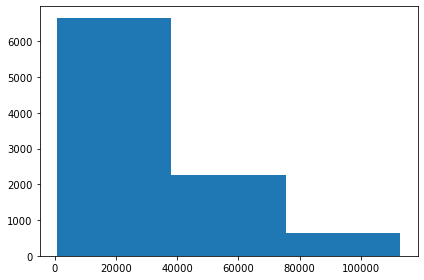

In [85]:
plt.hist(eda_df.Income, bins=3)
plt.tight_layout()

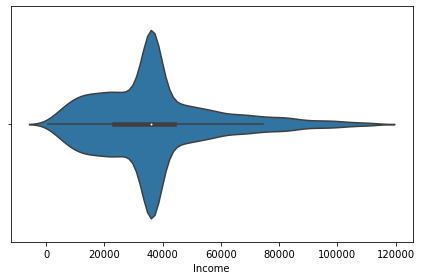

In [86]:
sns.violinplot(data=eda_df, x='Income')
plt.tight_layout()

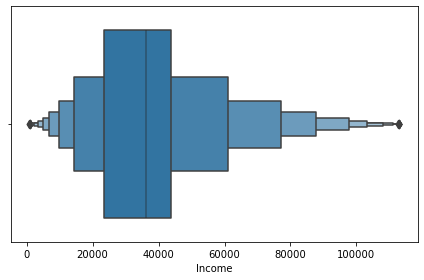

In [87]:
sns.boxenplot(data=eda_df, x='Income')
plt.tight_layout()

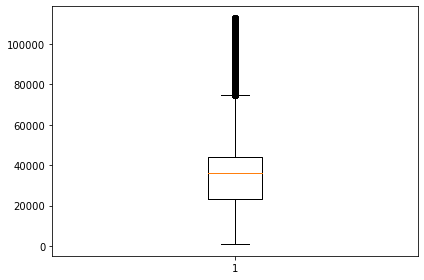

In [88]:
plt.boxplot(x=eda_df.Income)
plt.tight_layout()

In [89]:
cols_to_look_into = ['Outage_sec_perweek',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year']

# Outage_sec_perweek

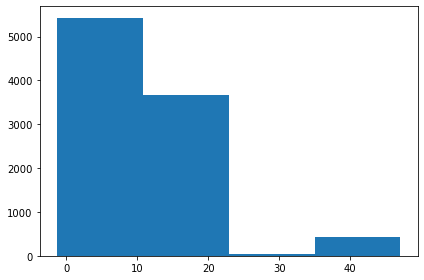

In [90]:
plt.hist(eda_df.Outage_sec_perweek, bins=4)
plt.tight_layout()

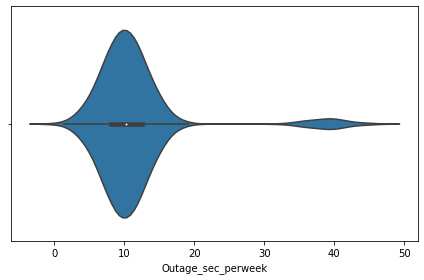

In [91]:
sns.violinplot(data=eda_df, x=df.Outage_sec_perweek)
plt.tight_layout()

In [92]:
# median = 10.19934181

In [93]:
eda_df['Outage_sec_perweek'].loc[eda_df.Outage_sec_perweek < 0] = 10.19934181

In [94]:
# df['Outage_sec_perweek'].loc[df.Outage_sec_perweek < 0] = 10.19934181

In [95]:
eda_df.Outage_sec_perweek.quantile(Percentages)

0.01     2.990809
0.25     8.062791
0.50    10.199342
0.75    12.476860
0.95    19.572184
0.99    41.237044
Name: Outage_sec_perweek, dtype: float64

In [96]:
Out_mean, Out_std = eda_df.Outage_sec_perweek.mean(), eda_df.Outage_sec_perweek.std()

In [97]:
Out_mean, Out_std

(11.450547967027193, 6.983031920114979)

In [98]:
Out_std * 3

20.94909576034494

In [99]:
(len(eda_df.Outage_sec_perweek >= 20) / len(eda_df.Outage_sec_perweek))

1.0

In [100]:
len(eda_df.Outage_sec_perweek >= 40)

9561

In [101]:
(len(eda_df.loc[eda_df.Outage_sec_perweek >=20]) / len(eda_df)) * 100

4.968099571174563

In [102]:
len(eda_df)

9561

In [103]:
eda_df['Outage_sec_perweek'].loc[eda_df.Outage_sec_perweek >=20] = 19.572184

/Users/cristophernimatuj/Desktop/Master_folder/jupyter/Jupyter_notebook/env/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [104]:
len(eda_df)

9561

In [105]:
# df['Outage_sec_perweek'].loc[df.Outage_sec_perweek >=20] = 19.572184

<AxesSubplot:xlabel='Outage_sec_perweek'>

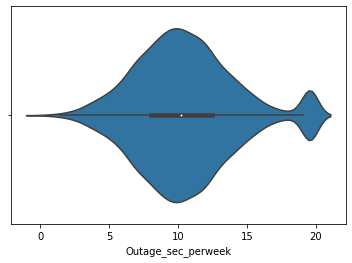

In [106]:

sns.violinplot(data=eda_df, x=eda_df.Outage_sec_perweek)

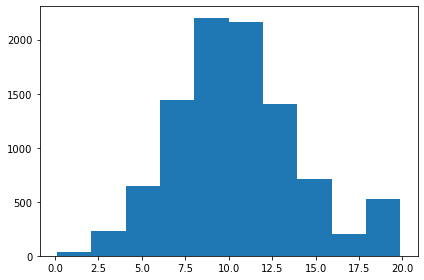

In [107]:
#😍
plt.hist(eda_df.Outage_sec_perweek)
plt.tight_layout()

In [108]:
cols_to_look_into = ['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']

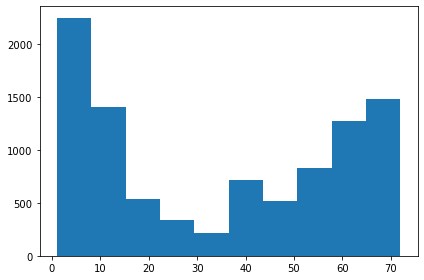

In [109]:
plt.hist(eda_df.Tenure)
plt.tight_layout()

<AxesSubplot:xlabel='Tenure'>

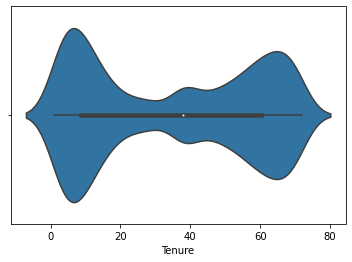

In [110]:
sns.violinplot(data=eda_df, x='Tenure')

<AxesSubplot:xlabel='Tenure'>

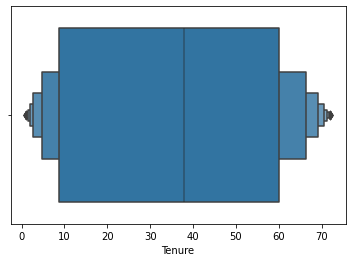

In [111]:
sns.boxenplot(data=eda_df, x='Tenure')

<AxesSubplot:xlabel='Tenure'>

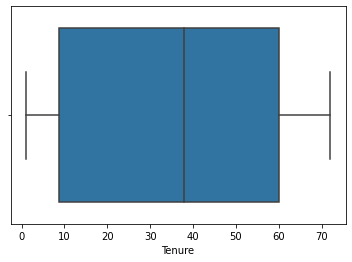

In [112]:
sns.boxplot(data=eda_df, x='Tenure')

### it does not seem to have outliers but lets dive into the numbers to see what we find

In [113]:
Ten_mean, Ten_std = eda_df.Tenure.mean(), eda_df.Tenure.std()
print('Tenure mean: %d' % Ten_mean)
print('Tenure std: %d' % Ten_std)

Ten_std_x3 = Ten_std * 3
print('Tenure 3*STD: %d' % Ten_std_x3)
#No sign of outliers 🥳
low, high = Ten_mean - Ten_std_x3, Ten_mean + Ten_std_x3

Outliers = [x for x in eda_df.Outage_sec_perweek if x < low or x > high]
print(f'Amount of outliers {len(Outliers)}')

Not_outliers = [x for x in eda_df.Outage_sec_perweek if x >= low and x <= high]
print(f'size of df: {len(eda_df)}')
print(f'size of df after outliers: {len(Not_outliers)}')

Tenure mean: 34
Tenure std: 25
Tenure 3*STD: 75
Amount of outliers 0
size of df: 9561
size of df after outliers: 9561


In [114]:
cols_to_look_into = ['MonthlyCharge', 'Bandwidth_GB_Year']

# Monthly Charge

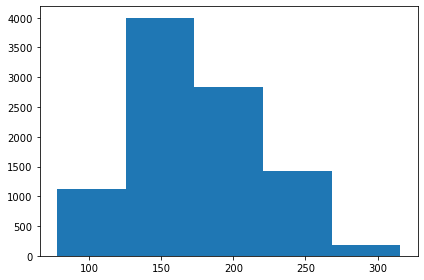

In [115]:
plt.hist(eda_df.MonthlyCharge, bins=5)
plt.tight_layout()

### 🧐 the left side of the histogram looks a bit odd. will have to look into this

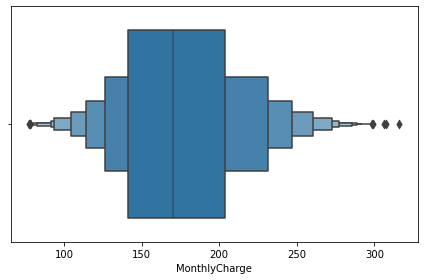

In [116]:
sns.boxenplot(data=eda_df, x=eda_df.MonthlyCharge)
plt.tight_layout()

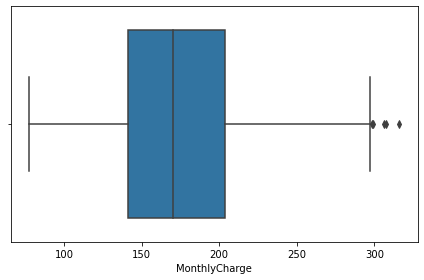

In [117]:
sns.boxplot(data=eda_df, x=eda_df.MonthlyCharge)
plt.tight_layout()

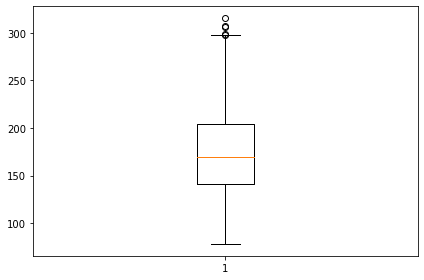

In [118]:
plt.boxplot(eda_df.MonthlyCharge)
plt.tight_layout()

# lets use the power of stats to find outliers


In [119]:
M_mean, M_std = eda_df.MonthlyCharge.mean(), eda_df.MonthlyCharge.std()
print('Monthly Charge: %d' % M_mean)
print('M_std: %d' % M_std)

cut_off = M_std * 3
print("3 standards deviations: %d" % cut_off)

low, high = M_mean - cut_off, M_mean + cut_off

outliers = [x for x in eda_df['MonthlyCharge'] if x < low or x > high]
print(f'Outliers found in dataset: {len(outliers)}')


Monthly Charge: 174
M_std: 43
3 standards deviations: 130
Outliers found in dataset: 3


In [120]:
high

304.2405228217738

In [121]:
# df['MonthlyCharge'].mean()

In [122]:
eda_df.MonthlyCharge.loc[eda_df.MonthlyCharge > 303]

928     307.528124
3747    315.878600
4701    306.268000
Name: MonthlyCharge, dtype: float64

In [123]:
eda_df['MonthlyCharge'].loc[(eda_df.MonthlyCharge < low) |
                           (eda_df.MonthlyCharge > high)] = 304

In [124]:
eda_df.loc[eda_df.MonthlyCharge == 304]

,Population,Email,Contacts,Phone,Yearly_equip_failure,Children,Age,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
928,2358,17,0,2,0,1.0,53.0,7598.570000,19.572184,6.434281,304.0,1482.558282
3747,38,18,1,0,0,0.0,53.0,36913.919693,19.572184,5.962119,304.0,1288.595000
4701,2144,12,0,2,0,4.0,32.0,52866.310000,19.572184,4.581601,304.0,1383.764000


In [125]:
# df.MonthlyCharge.loc[df.MonthlyCharge > 304]

In [126]:
# df['MonthlyCharge'].loc[(df.MonthlyCharge < low) |
#                            (df.MonthlyCharge > high)] = 304

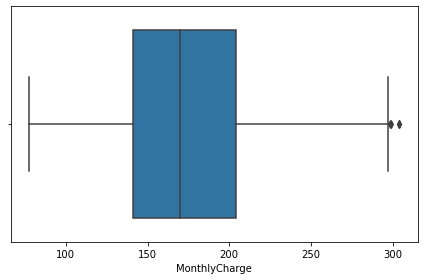

In [127]:
sns.boxplot(data=eda_df, x=eda_df.MonthlyCharge)
plt.tight_layout()

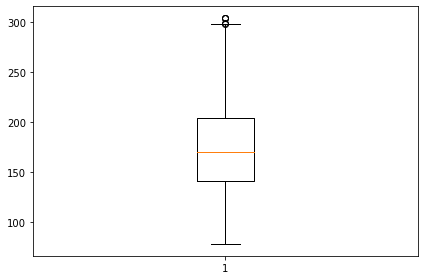

In [128]:
plt.boxplot(eda_df.MonthlyCharge)
plt.tight_layout()

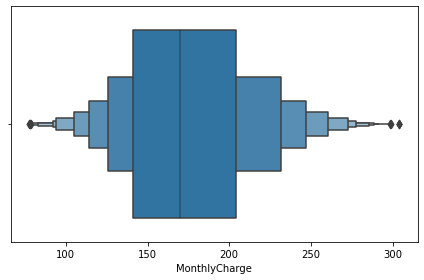

In [129]:
sns.boxenplot(data=eda_df, x=eda_df.MonthlyCharge)
plt.tight_layout()

In [130]:
low

43.89675530126567

In [131]:
eda_df.MonthlyCharge.describe()

count    9561.00000
mean      174.06679
std        43.38490
min        77.50523
25%       141.04060
50%       169.87889
75%       203.88810
max       304.00000
Name: MonthlyCharge, dtype: float64

In [132]:
cols_to_look_into

['MonthlyCharge', 'Bandwidth_GB_Year']

# Bandwidth GB Year

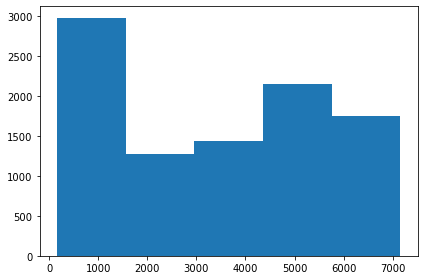

In [133]:
plt.hist(eda_df.Bandwidth_GB_Year, bins = 5)
plt.tight_layout()

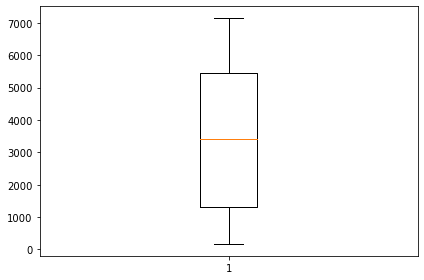

In [134]:
plt.boxplot(eda_df.Bandwidth_GB_Year)
plt.tight_layout()

# so far so good

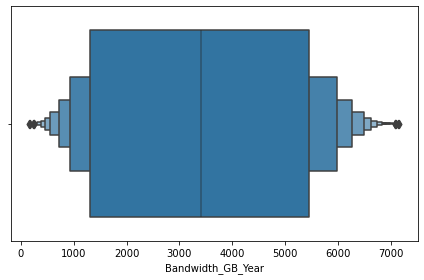

In [135]:
sns.boxenplot(data=eda_df, x=eda_df.Bandwidth_GB_Year)
plt.tight_layout()

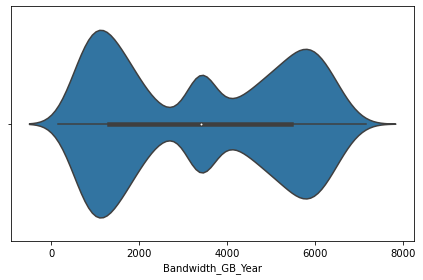

In [136]:
sns.violinplot(data=eda_df, x=eda_df.Bandwidth_GB_Year)
plt.tight_layout()

In [137]:
Band_mean, Band_std = eda_df.Bandwidth_GB_Year.mean(), eda_df.Bandwidth_GB_Year.std()
print('Bandwidth mean: %d' % Band_mean)
print('Bandwidth std: %d' % Band_std)
plt.tight_layout()

Bandwidth mean: 3393
Bandwidth std: 2072


<Figure size 432x288 with 0 Axes>

# just by looking at the visualizations and std I can almost guarantee that there is no anomalie in the column

In [138]:
eda_df.Bandwidth_GB_Year.describe()

count    9561.000000
mean     3393.494576
std      2072.132205
min       155.506715
25%      1308.577000
50%      3399.029431
75%      5460.848000
max      7158.982000
Name: Bandwidth_GB_Year, dtype: float64

In [139]:
cut_off = Band_std * 3
low, high = Band_mean - cut_off, Band_mean + cut_off
outliers = [x for x in eda_df['Bandwidth_GB_Year'] if x < low or x > high]
len(outliers)

0

In [140]:
eda_df.describe()

,Population,Email,Contacts,Phone,Yearly_equip_failure,Children,Age,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,9561.000000,9561.000000,9561.000000,9561.000000,9561.000000,9561.000000,9561.000000,9561.000000,9561.000000,9561.000000,9561.00000,9561.000000
mean,8489.709863,12.019768,0.995921,1.711955,0.398494,2.073632,53.195272,37188.823977,10.495576,34.414890,174.06679,3393.494576
std,11759.509208,2.974671,0.990691,0.638932,0.635239,1.866355,17.975612,20708.107406,3.664595,25.209238,43.38490,2072.132205
min,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,18.000000,740.660000,0.113821,1.000259,77.50523,155.506715
25%,712.000000,10.000000,0.000000,2.000000,0.000000,1.000000,41.000000,23406.730000,8.062791,8.686291,141.04060,1308.577000
50%,2719.000000,12.000000,1.000000,2.000000,0.000000,2.000000,53.000000,36028.798176,10.199342,37.780000,169.87889,3399.029431
75%,11762.000000,14.000000,2.000000,2.000000,1.000000,3.000000,65.000000,43882.720000,12.476860,60.099350,203.88810,5460.848000
max,52967.000000,20.000000,7.000000,2.000000,6.000000,10.000000,89.000000,112961.800000,19.883050,71.999280,304.00000,7158.982000


In [141]:
# df.to_csv('Ready_for_pca.csv')

In [142]:
for key, values in eda_df.items():
    print(f'\n\n\n**{key}***')
    print(df[key].value_counts())




**Population***
0        97
94       14
110      12
39       12
69       11
         ..
27089     1
29138     1
3991      1
25048     1
6049      1
Name: Population, Length: 5933, dtype: int64



**Email***
12    1310
11    1291
13    1268
10    1074
14    1060
15     779
9      774
8      543
16     517
17     351
7      316
18     203
6      185
5      109
19     100
20      51
4       31
3       14
21      12
2        6
1        3
22       2
23       1
Name: Email, dtype: int64



**Contacts***
0    3680
1    3675
2    1872
3     608
4     137
5      20
6       5
7       3
Name: Contacts, dtype: int64



**Phone***
2    8128
0    1026
1     846
Name: Phone, dtype: int64



**Yearly_equip_failure***
0    6727
1    2670
2     509
3      86
4       7
6       1
Name: Yearly_equip_failure, dtype: int64



**Children***
2.0     3595
0.0     1919
1.0     1874
3.0     1096
4.0      769
5.0      161
8.0      158
7.0      149
6.0      135
10.0      74
9.0       70
Name: Children, dtype: in

In [143]:
df.iloc[:, 48:]

,item8,ChildrenIsMissing,AgeIs_missing,Techieis_missing,Phoneis_missing,TechSupportis_missing,Tenure_is_missing,Bandwidth_GB_YearIs_missing
1,4,True,False,False,False,False,False,False
2,4,False,False,False,False,False,False,False
3,3,False,False,False,False,False,False,False
4,3,False,False,False,False,False,False,False
5,5,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
9996,3,False,True,True,True,False,False,False
9997,5,False,False,True,True,False,False,False
9998,5,True,True,False,False,False,True,False
9999,4,False,False,False,False,False,False,False


In [144]:
eda_df

,Population,Email,Contacts,Phone,Yearly_equip_failure,Children,Age,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
1,38,10,0,2,1,2.0,68.0,28561.990000,6.972566,6.795513,171.449762,904.536110
2,10446,12,0,2,1,1.0,27.0,21704.770000,12.014541,1.156681,242.948015,800.982766
3,3735,9,0,2,1,4.0,50.0,36028.798176,10.245616,15.754144,159.440398,2054.706961
4,13863,15,2,2,0,1.0,48.0,18925.230000,15.206193,17.087227,120.249493,2164.579412
5,11352,16,2,1,1,0.0,83.0,40074.190000,8.960316,1.670972,150.761216,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,210,14,1,2,0,2.0,46.0,56384.350000,7.110666,28.230000,143.687900,4945.756000
9996,640,12,2,0,0,3.0,53.0,55723.740000,9.265392,68.197130,159.828800,6511.253000
9998,406,10,0,2,0,2.0,53.0,36028.798176,4.837696,37.780000,168.220900,4159.306000
9999,35575,14,1,1,0,1.0,39.0,16667.580000,12.076460,71.095600,252.628600,6468.457000


In [145]:
df

,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,...,item6,item7,item8,ChildrenIsMissing,AgeIs_missing,Techieis_missing,Phoneis_missing,TechSupportis_missing,Tenure_is_missing,Bandwidth_GB_YearIs_missing
1,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,...,4,3,4,True,False,False,False,False,False,False
2,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,...,3,4,4,False,False,False,False,False,False,False
3,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,...,3,3,3,False,False,False,False,False,False,False
4,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,...,4,3,3,False,False,False,False,False,False,False
5,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,...,4,4,5,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,Rural,America/New_York,...,3,2,3,False,True,True,True,False,False,False
9997,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,Rural,America/Chicago,...,5,2,5,False,False,True,True,False,False,False
9998,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,Rural,America/Chicago,...,4,4,5,True,True,False,False,False,True,False
9999,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,30117,33.58016,-85.13241,35575,Urban,America/New_York,...,3,5,4,False,False,False,False,False,False,False
